# TFM - Grupo 2 - Entrega 18/05/2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from ydata_profiling import ProfileReport
import datetime

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df1 = pd.read_csv("data/daily_calendar_with_events.csv")

In [3]:
# daily_calendar_with_events.csv

df1.head()

date    weekday  weekday_int    d event
0  2011-01-29   Saturday            1  d_1   NaN
1  2011-01-30     Sunday            2  d_2   NaN
2  2011-01-31     Monday            3  d_3   NaN
3  2011-02-01    Tuesday            4  d_4   NaN
4  2011-02-02  Wednesday            5  d_5   NaN

In [4]:
df1['date'] = pd.to_datetime(df1.date)
df1.set_index('date', inplace=True)

In [5]:
df1.head(1)

weekday  weekday_int    d event
date                                        
2011-01-29  Saturday            1  d_1   NaN

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1913 entries, 2011-01-29 to 2016-04-24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   weekday      1913 non-null   object
 1   weekday_int  1913 non-null   int64 
 2   d            1913 non-null   object
 3   event        26 non-null     object
dtypes: int64(1), object(3)
memory usage: 74.7+ KB


In [7]:
# Substituir linhas com valores NaN por 'Normalday'

df1.fillna('Normalday', inplace=True)

In [8]:
df1.head()

weekday  weekday_int    d      event
date                                              
2011-01-29   Saturday            1  d_1  Normalday
2011-01-30     Sunday            2  d_2  Normalday
2011-01-31     Monday            3  d_3  Normalday
2011-02-01    Tuesday            4  d_4  Normalday
2011-02-02  Wednesday            5  d_5  Normalday

In [9]:
df1.shape

(1913, 4)

In [10]:
df1['event'].value_counts()

Normalday         1887
SuperBowl            6
Ramadan starts       5
Thanksgiving         5
NewYear              5
Easter               5
Name: event, dtype: int64

In [11]:
#selecionar automaticamente variáveis numericas
df_num = df1._get_numeric_data()

In [12]:
df_num.head(1)

weekday_int
date                   
2011-01-29            1

In [13]:
# função para criar boxplots de todas as variáveis de uma dada dataframe
def plot_box_plots(df1, fig_size = (12, 20)):
    """
    df: dataframe with only numerical variables
    fig_size: size of each sub plot
    output: box plots of each variable
    """
    
    #create structure
    fig, axes = plt.subplots(math.ceil(len(df1.columns) / 3), 3, figsize = fig_size)

    #iteration by column
    for i, ax in enumerate(fig.axes):
        if i < len(df1.columns):
            sns.boxplot(x=df1.columns[i], data=df1, ax=ax)
    
    # choose when hide figure
    if round((len(df1.columns) / 3) % 1, 2) == 0.33:
        axes.flat[-2].set_visible(False)
        axes.flat[-1].set_visible(False)
    elif round((len(df.columns) / 3) % 1, 2) == 0.67:
        axes.flat[-1].set_visible(False)
    else:
        pass
    
    fig.tight_layout()

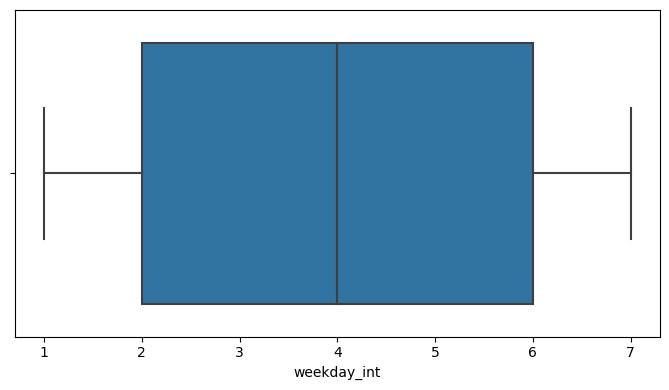

In [14]:
plot_box_plots(df_num, (20, 4))

In [15]:
# Dados em falta

df1.isnull().sum()

weekday        0
weekday_int    0
d              0
event          0
dtype: int64

# Pandas Profiling

In [16]:
profile = ProfileReport(df1, title="Pandas Profiling Report")


In [17]:
profile.to_file("daily_calendar_with_events.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/dcm/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
# Dataset item_prices.csv

df2 = pd.read_csv("data/item_prices.csv")

df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


item    category store_code  yearweek  sell_price
0  ACCESORIES_1_001  ACCESORIES      NYC_1  201328.0     12.7414
1  ACCESORIES_1_001  ACCESORIES      NYC_1  201329.0     12.7414
2  ACCESORIES_1_001  ACCESORIES      NYC_1  201330.0     10.9858
3  ACCESORIES_1_001  ACCESORIES      NYC_1  201331.0     10.9858
4  ACCESORIES_1_001  ACCESORIES      NYC_1  201332.0     10.9858

Em um contexto de uma tabela de preços de itens (item_prices), o valor de yearweek geralmente seria usado para indicar em qual semana específica os preços foram registrados ou atualizados para um determinado item. Aqui está uma explicação mais detalhada:

Identificação da Semana: O valor yearweek provavelmente consistiria em um número que combina o ano com o número da semana dentro desse ano. Por exemplo, "201328" pode significar a vigésima oitava semana do ano de 2013.

In [31]:
# Drop da coluna 'yearweek' 
    
df2.drop('yearweek', axis=1, inplace=True)

In [32]:
# Dados em falta

df2.isnull().sum()

item          0
category      0
store_code    0
sell_price    0
dtype: int64

In [33]:
# Eliminar linhas duplicadas

df2 = df2.drop_duplicates()

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84438 entries, 0 to 6965583
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        84438 non-null  object 
 1   category    84438 non-null  object 
 2   store_code  84438 non-null  object 
 3   sell_price  84438 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [35]:
profile = ProfileReport(df2, title="Pandas Profiling Report")

In [36]:
profile.to_file("item_prices.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/dcm/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# DataSet item_sales.csv

df3 = pd.read_csv("data/item_sales.csv")

df3.head()

id              item    category    department  \
0  ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  ACCESORIES  ACCESORIES_1   
1  ACCESORIES_1_002_NYC_1  ACCESORIES_1_002  ACCESORIES  ACCESORIES_1   
2  ACCESORIES_1_003_NYC_1  ACCESORIES_1_003  ACCESORIES  ACCESORIES_1   
3  ACCESORIES_1_004_NYC_1  ACCESORIES_1_004  ACCESORIES  ACCESORIES_1   
4  ACCESORIES_1_005_NYC_1  ACCESORIES_1_005  ACCESORIES  ACCESORIES_1   

               store store_code    region  d_1  d_2  d_3  d_4  d_5  d_6  d_7  \
0  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
1  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
2  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
3  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   
4  Greenwich_Village      NYC_1  New York    0    0    0    0    0    0    0   

   d_8  d_9  d_10  d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  \
0    0    0     0     0     0     0     0     0     0     0     0     0     0   
1    0    0     0     0     0     0     0     0     0     0     0     0     0   
2    0    0     0     0     0     0     0     0     0     0     0     0     0   
3    0    0     0     0     0     0     0     0     0     0     0     0     0   
4    0    0     0     0     0     0     0     0     0     0     0     0     0   

   d_21  d_22  d_23  d_24  d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_33  d_34  d_35  d_36  d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     2     0     0     0     2     0     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_45  d_46  d_47  d_48  d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     2     0     1     0     0     1     1   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_57  d_58  d_59  d_60  d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     1     0     2     3     1     0     0     0     0     0     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_69  d_70  d_71  d_72  d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     1     0     0     1     0     0     1     2     3     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_81  d_82  d_83  d_84  d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0   

In [9]:
df3.shape

(30490, 1920)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to d_1913
dtypes: int64(1913), object(7)
memory usage: 446.6+ MB


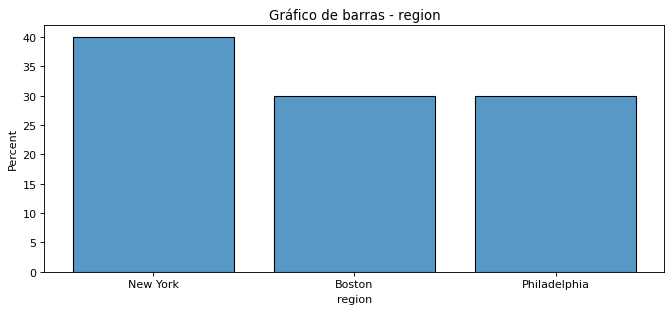

In [11]:
plt.figure(figsize=(10, 4), dpi=80)
sns.histplot(data=df3, x="region", shrink=.8, stat='percent')
plt.title("Gráfico de barras - region")
plt.show()

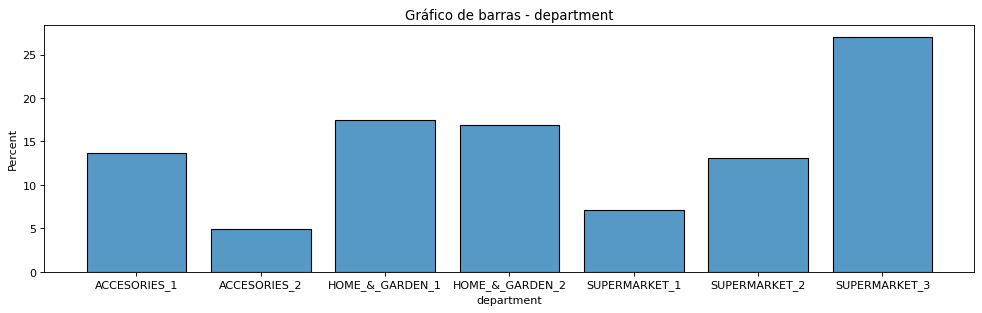

In [12]:
plt.figure(figsize=(15, 4), dpi=80)
sns.histplot(data=df3, x="department", shrink=.8, stat='percent')
plt.title("Gráfico de barras - department")
plt.show()

In [13]:
df3.describe(datetime_is_numeric=True)

d_1           d_2           d_3           d_4           d_5  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       1.070220      1.041292      0.780026      0.833454      0.627944   
std        5.126689      5.365468      3.667454      4.415141      3.379344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      360.000000    436.000000    207.000000    323.000000    296.000000   

                d_6           d_7           d_8           d_9          d_10  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.958052      0.918662      1.244080      1.073663      0.838701   
std        4.785947      5.059495      6.617729      5.917204      4.206199   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      314.000000    316.000000    370.000000    385.000000    353.000000   

               d_11          d_12          d_13          d_14          d_15  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.756674      0.775927      0.779141      0.867334      1.142440   
std        3.665969      3.697822      3.486595      3.484608      4.636395   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      279.000000    258.000000    163.000000    107.000000    133.000000   

               d_16          d_17          d_18          d_19          d_20  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       1.193178      0.715120      0.789439      0.703280      0.666382   
std        4.662770      2.993414      3.296922      2.811648      2.611911   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      149.000000    122.000000    111.000000     83.000000     95.000000   

               d_21          d_22          d_23          d_24          d_25  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.777993      1.039324      0.960413      0.786028      0.672384   
std        2.985123      3.923110      3.597620      3.084773      2.874189   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      100.000000    132.000000    120.000000    113.000000    158.000000   

               d_26          d_27          d_28          d_29          d_30  \
count  30490.000000  30490.000000  30490.000000  30490.000000  30490.000000   
mean       0.680781      0.665038      0.738898      0.980912      0.941522   
std        2.727852      2.637849      2.842334      3.714944      3.688771   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000

In [14]:
df3.describe(include=[object])

id              item     category     department  \
count                    30490             30490        30490          30490   
unique                   30490              3049            3              7   
top     ACCESORIES_1_001_NYC_1  ACCESORIES_1_001  SUPERMARKET  SUPERMARKET_3   
freq                         1                10        14370           8230   

                    store store_code    region  
count               30490      30490     30490  
unique                 10         10         3  
top     Greenwich_Village      NYC_1  New York  
freq                 3049       3049     12196

In [15]:
df3['region'].value_counts()

New York        12196
Boston           9147
Philadelphia     9147
Name: region, dtype: int64

In [16]:
df3['department'].value_counts()

SUPERMARKET_3      8230
HOME_&_GARDEN_1    5320
HOME_&_GARDEN_2    5150
ACCESORIES_1       4160
SUPERMARKET_2      3980
SUPERMARKET_1      2160
ACCESORIES_2       1490
Name: department, dtype: int64

In [17]:
df3['store'].value_counts()

Greenwich_Village    3049
Harlem               3049
Tribeca              3049
Brooklyn             3049
South_End            3049
Roxbury              3049
Back_Bay             3049
Midtown_Village      3049
Yorktown             3049
Queen_Village        3049
Name: store, dtype: int64

In [18]:
df3['category'].value_counts()

SUPERMARKET      14370
HOME_&_GARDEN    10470
ACCESORIES        5650
Name: category, dtype: int64

In [19]:
# para excluir todas as colunas numéricas de uma vez
df3_sem_numericas = df3.select_dtypes(exclude=['number'])
df3_sem_numericas


id               item     category     department  \
0       ACCESORIES_1_001_NYC_1   ACCESORIES_1_001   ACCESORIES   ACCESORIES_1   
1       ACCESORIES_1_002_NYC_1   ACCESORIES_1_002   ACCESORIES   ACCESORIES_1   
2       ACCESORIES_1_003_NYC_1   ACCESORIES_1_003   ACCESORIES   ACCESORIES_1   
3       ACCESORIES_1_004_NYC_1   ACCESORIES_1_004   ACCESORIES   ACCESORIES_1   
4       ACCESORIES_1_005_NYC_1   ACCESORIES_1_005   ACCESORIES   ACCESORIES_1   
...                        ...                ...          ...            ...   
30485  SUPERMARKET_3_823_PHI_3  SUPERMARKET_3_823  SUPERMARKET  SUPERMARKET_3   
30486  SUPERMARKET_3_824_PHI_3  SUPERMARKET_3_824  SUPERMARKET  SUPERMARKET_3   
30487  SUPERMARKET_3_825_PHI_3  SUPERMARKET_3_825  SUPERMARKET  SUPERMARKET_3   
30488  SUPERMARKET_3_826_PHI_3  SUPERMARKET_3_826  SUPERMARKET  SUPERMARKET_3   
30489  SUPERMARKET_3_827_PHI_3  SUPERMARKET_3_827  SUPERMARKET  SUPERMARKET_3   

                   store store_code        region  
0      Greenwich_Village      NYC_1      New York  
1      Greenwich_Village      NYC_1      New York  
2      Greenwich_Village      NYC_1      New York  
3      Greenwich_Village      NYC_1      New York  
4      Greenwich_Village      NYC_1      New York  
...                  ...        ...           ...  
30485      Queen_Village      PHI_3  Philadelphia  
30486      Queen_Village      PHI_3  Philadelphia  
30487      Queen_Village      PHI_3  Philadelphia  
30488      Queen_Village      PHI_3  Philadelphia  
30489      Queen_Village      PHI_3  Philadelphia  

[30490 rows x 7 columns]

In [20]:
df3_sem_numericas.shape

(30490, 7)

In [21]:
profile = ProfileReport(df3_sem_numericas, title="Pandas Profiling Report")

In [22]:
profile.to_file("item_sales.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]